Mutivariate Regression Analysis
Videos can be found at: https://www.youtube.com/channel/UCBsTB02yO0QGwtlfiv5m25Q

Import our Libraries
The first thing we need to do is import the libraries we will be using in this tutorial. To visualize our data, we will be using matplotlib and seaborn to create heatmaps and a scatter matrix. To build our model, we will be using the sklearn library, and the evaluation will be taking place with the statsmodels library. I've also added a few additional modules to help calculate certain metrics.

In [1]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [6]:
#load nhl data
nhl_data = pd.read_csv('test_nhl_data.csv')
nhl_data.head()

,TEAM,GA,SF/G,SA/G,SVPCT,PIM,PIMA
0,Nashville,33,31.9,30.1,0.900,87,109
1,Colorado,30,31.4,33.6,0.919,102,140
2,Washington,43,30.3,31.0,0.893,125,111
3,Montreal,35,34.4,31.1,0.898,77,83
4,Philadelphia,25,35.9,26.8,0.896,67,77


In [8]:
# make sure columns are floats
cols = nhl_data.columns.drop('TEAM')
nhl_data[cols] = nhl_data[cols].astype(float)

# set the index to the team column
nhl_data = nhl_data.set_index('TEAM')
nhl_data.head()

,GA,SF/G,SA/G,SVPCT,PIM,PIMA
TEAM,,,,,,
Nashville,33.0,31.9,30.1,0.900,87.0,109.0
Colorado,30.0,31.4,33.6,0.919,102.0,140.0
Washington,43.0,30.3,31.0,0.893,125.0,111.0
Montreal,35.0,34.4,31.1,0.898,77.0,83.0
Philadelphia,25.0,35.9,26.8,0.896,67.0,77.0


,GA,SF/G,SA/G,SVPCT,PIM,PIMA
GA,1.000000,0.234225,0.053052,-0.746298,0.308786,0.340496
SF/G,0.234225,1.000000,-0.176113,-0.339723,-0.191058,0.166129
SA/G,0.053052,-0.176113,1.000000,0.268357,0.219667,0.178394
SVPCT,-0.746298,-0.339723,0.268357,1.000000,-0.003476,-0.061369
PIM,0.308786,-0.191058,0.219667,-0.003476,1.000000,0.730925
PIMA,0.340496,0.166129,0.178394,-0.061369,0.730925,1.000000


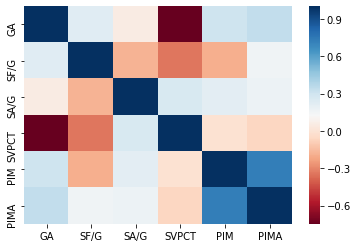

In [9]:
# avoid multicolinearity (where explanatory varibales are too correlated)
# calculate the correlation matrix
corr = nhl_data.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

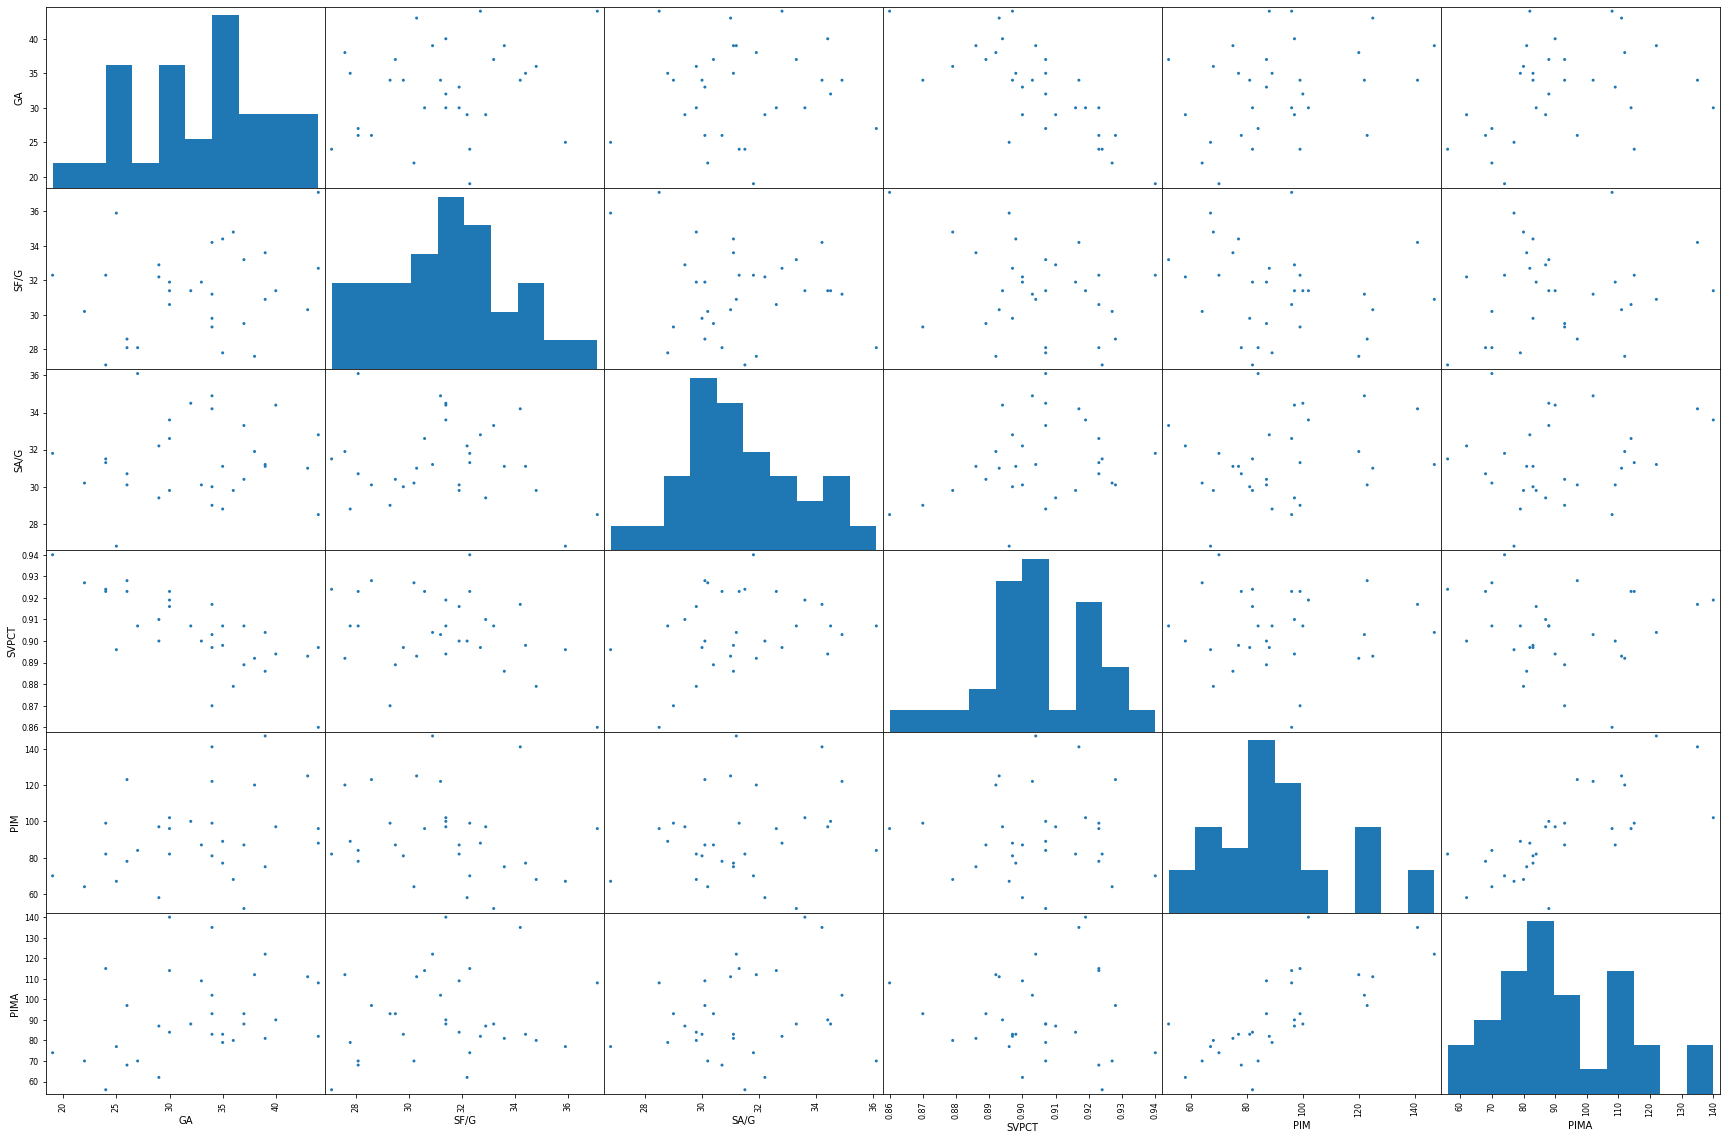

In [10]:
# visualize data with scatter matrix to show distribution of variables plus scatterplot with every variable pairing
# define the plot
pd.plotting.scatter_matrix(nhl_data, alpha = 1, figsize = (30, 20))

# show the plot
plt.show()

In [11]:
# get the summary of data
desc_df = nhl_data.describe()
desc_df

,GA,SF/G,SA/G,SVPCT,PIM,PIMA
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,32.548387,31.377419,31.390323,0.904387,92.032258,92.032258
std,6.510703,2.487128,2.110032,0.017655,23.020982,20.501193
min,19.000000,27.100000,26.800000,0.860000,52.000000,56.000000
25%,28.000000,29.650000,30.050000,0.895000,77.500000,79.500000
50%,34.000000,31.400000,31.100000,0.904000,88.000000,88.000000
75%,37.000000,32.800000,32.700000,0.918000,99.500000,108.500000
max,44.000000,37.100000,36.100000,0.940000,147.000000,140.000000


In [12]:
# remove outliers
# filter the data frame to remove the values exceeding 3 standard deviations
nhl_remove_data = nhl_data[(np.abs(stats.zscore(nhl_data)) < 3).all(axis=1)]

# what rows were removed
nhl_data.index.difference(nhl_remove_data.index)

Index([], dtype='object', name='TEAM')

In [16]:
# build the model
# define our input variable (X) & output variable (Y)
# input contains explanatory variables and output contains goals against (GA)
X = nhl_data.drop('GA', axis = 1)
Y = nhl_data[['GA']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

print(est.summary())

#adjusted r squared indicated the percentage that variables in our model contribute to overall variablity (e.g., 63% indeicates 47% is unexplained)

                            OLS Regression Results                            
Dep. Variable:                     GA   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     11.61
Date:                Sun, 27 Oct 2019   Prob (F-statistic):           7.15e-06
Time:                        20:03:18   Log-Likelihood:                -82.950
No. Observations:                  31   AIC:                             177.9
Df Residuals:                      25   BIC:                             186.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        266.3188     44.405      5.997      0.0

C:\Users\jvanzalk\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
#remove insignificant factors and rerun model
nhl_data_after = nhl_data.drop(['SF/G', 'PIM','PIMA'], axis = 1)

X = nhl_data_after.drop('GA', axis = 1)
Y = nhl_data_after[['GA']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                     GA   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     23.44
Date:                Sun, 27 Oct 2019   Prob (F-statistic):           1.04e-06
Time:                        20:12:30   Log-Likelihood:                -86.307
No. Observations:                  31   AIC:                             178.6
Df Residuals:                      28   BIC:                             182.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.4354     38.556      7.248      0.0

C:\Users\jvanzalk\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [18]:
# print the p-values
est.pvalues

const    6.868610e-08
SA/G     3.071193e-02
SVPCT    2.012288e-07
dtype: float64